<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Uber_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('UberDataset.csv')

In [3]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
print(data.describe())

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [6]:
print(data['CATEGORY'].value_counts())

Business    1078
Personal      77
Name: CATEGORY, dtype: int64


In [7]:
total_miles=data['MILES'].sum()
print('Total miles driven:',total_miles)

Total miles driven: 24409.4


In [8]:
avg_miles_per_trip=data['MILES'].mean()
print('Average miles per trips:',avg_miles_per_trip)

Average miles per trips: 21.115397923875435


In [9]:
missing_purpose_count=data['PURPOSE'].isnull().sum()
print('Number of missing values in purpose columns:',missing_purpose_count)

Number of missing values in purpose columns: 503


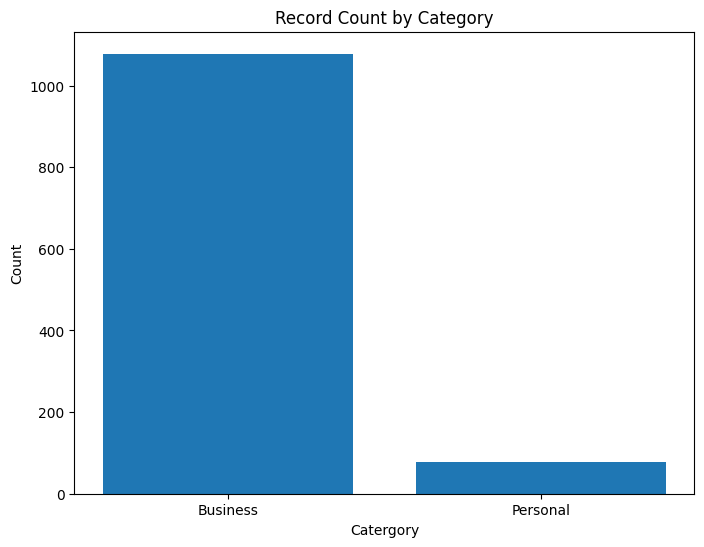

In [10]:
category_counts=data['CATEGORY'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(category_counts.index,category_counts.values)
plt.xlabel('Catergory')
plt.ylabel('Count')
plt.title('Record Count by Category')
plt.show()

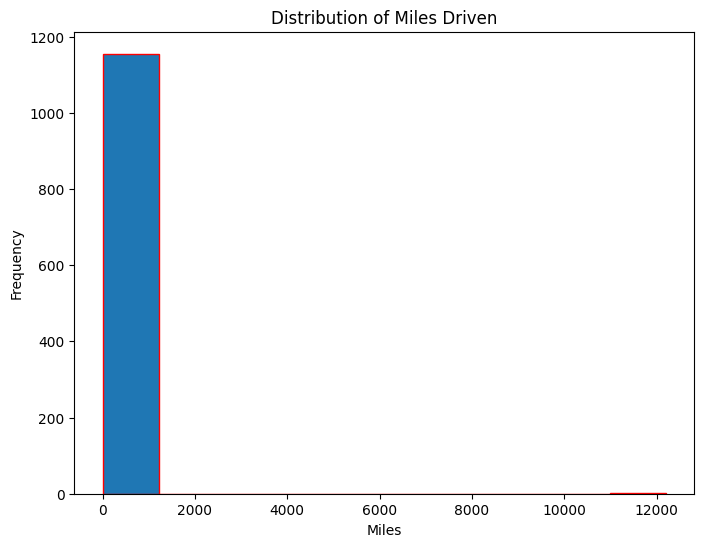

In [11]:
plt.figure(figsize=(8,6))
plt.hist(data['MILES'],bins=10,edgecolor='red')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Miles Driven')
plt.show()

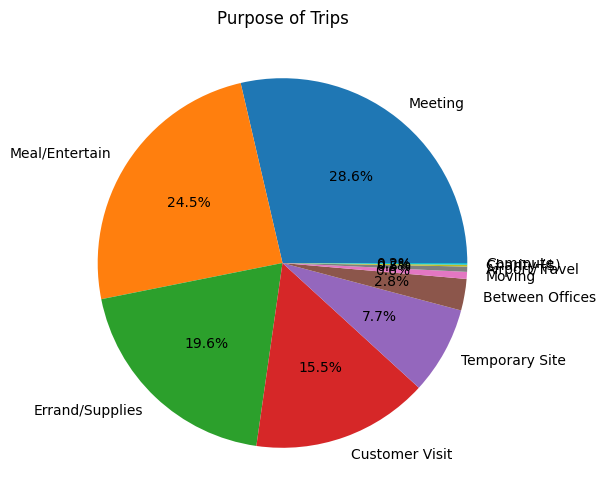

In [12]:
purpose_counts=data['PURPOSE'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(purpose_counts.values,labels=purpose_counts.index,autopct='%1.1f%%')
plt.title('Purpose of Trips')
plt.show()

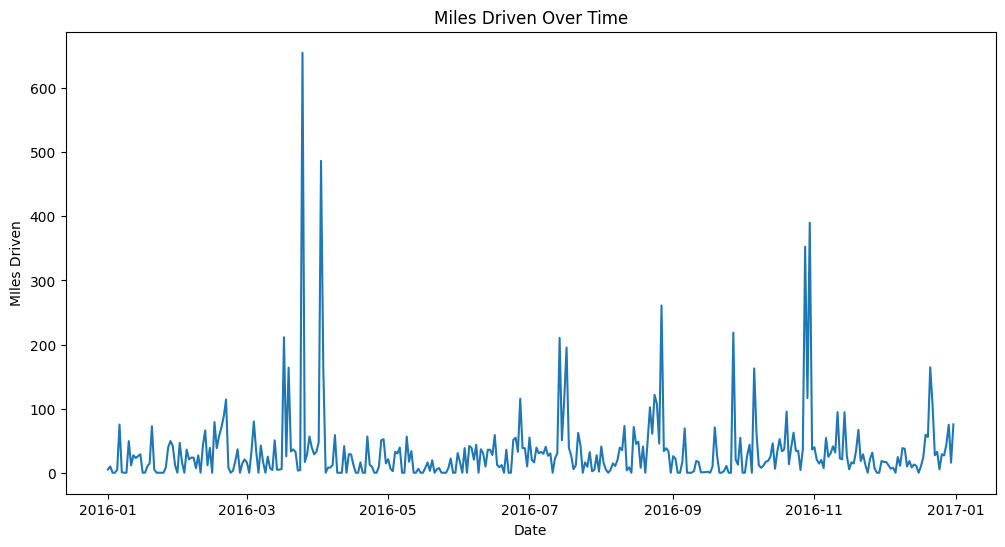

In [13]:
data=data[data['START_DATE']!='Totals']
data['START_DATE']=pd.to_datetime(data['START_DATE'])
data.set_index('START_DATE',inplace=True)
daily_miles=data.resample('D')['MILES'].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_miles.index,daily_miles.values)
plt.xlabel('Date')
plt.ylabel('MIles Driven')
plt.title('Miles Driven Over Time')
plt.show()

<Figure size 1000x600 with 0 Axes>

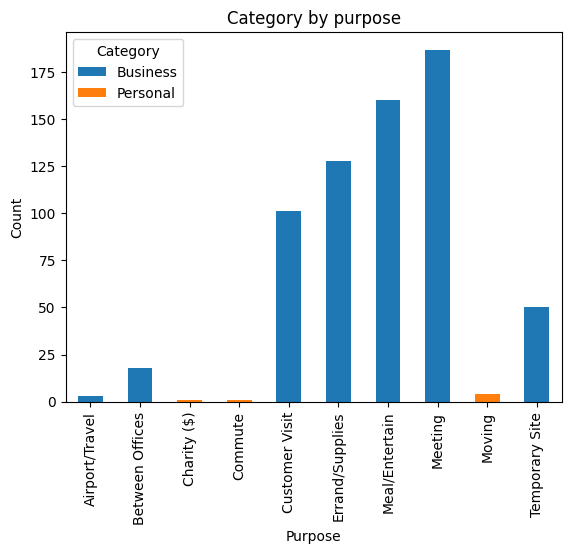

In [14]:
catergory_purpose=data.pivot_table(index='PURPOSE',columns='CATEGORY',aggfunc='size',fill_value=0)
plt.figure(figsize=(10,6))
catergory_purpose.plot(kind='bar',stacked=True)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Category by purpose')
plt.legend(title='Category')
plt.show()

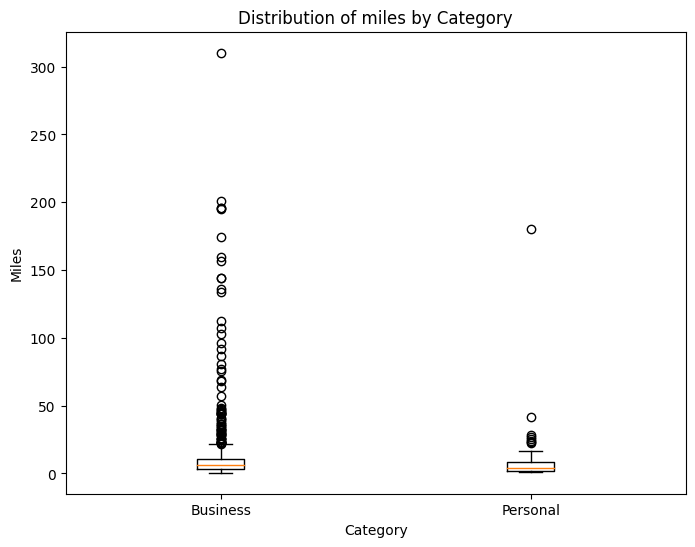

In [15]:
plt.figure(figsize=(8,6))
plt.boxplot([data[data['CATEGORY']=='Business']['MILES'],data[data['CATEGORY']=='Personal']['MILES']],labels=['Business','Personal'])
plt.xlabel('Category')
plt.ylabel('Miles')
plt.title('Distribution of miles by Category')
plt.show()

In [19]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
import lightgbm as lgb


In [21]:
import seaborn as sns

In [22]:
df=pd.read_csv('UberDataset.csv')

In [27]:
features=['START','STOP','CATEGORY','PURPOSE']

In [28]:
X=df[features]
X=pd.get_dummies(X)
y=df['MILES']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
models={
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'SVR':SVR(),
    'XGBoost':xgb.XGBRegressor(),
    'LightGBM':lgb.LGBMRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor(),
    'ADA Boost':AdaBoostRegressor(),
    'Linear SVR':LinearSVR(),


}

Result for Linear Regression:
Mean Squared Error :1.425940679256453e+27
R-squared score:-3.3189595640350474e+24


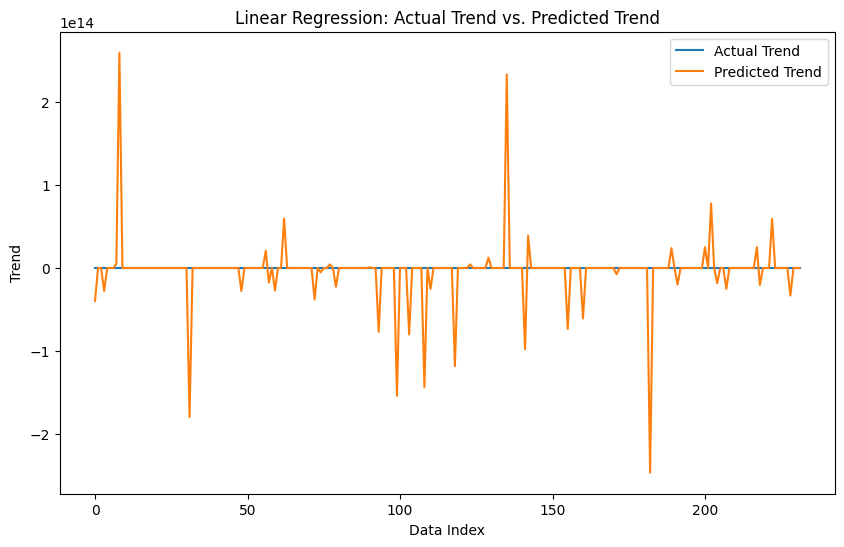


Result for Decision Tree:
Mean Squared Error :283.38912113331537
R-squared score:0.3403953982017325


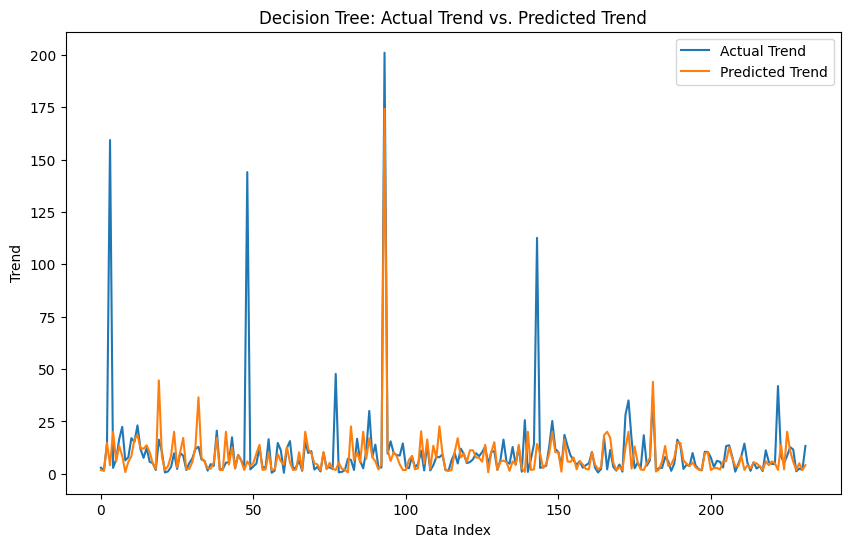


Result for Random Forest:
Mean Squared Error :348.1779252265854
R-squared score:0.18959570217238708


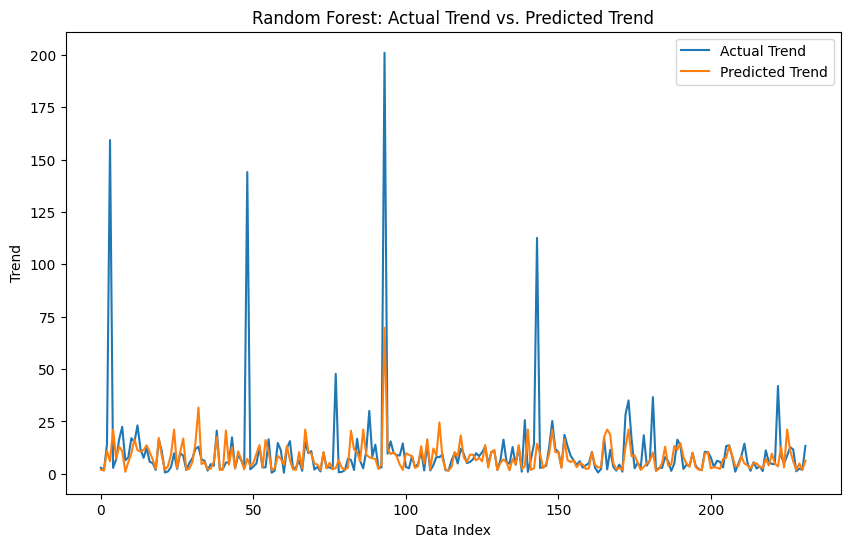


Result for SVR:
Mean Squared Error :428.6942224068472
R-squared score:0.0021893545770135248


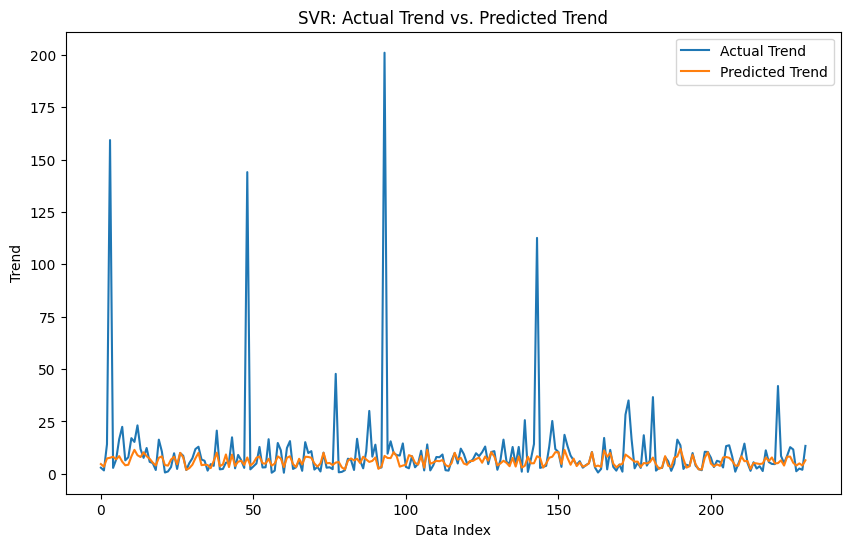


Result for XGBoost:
Mean Squared Error :280.3095159348669
R-squared score:0.34756335776381775


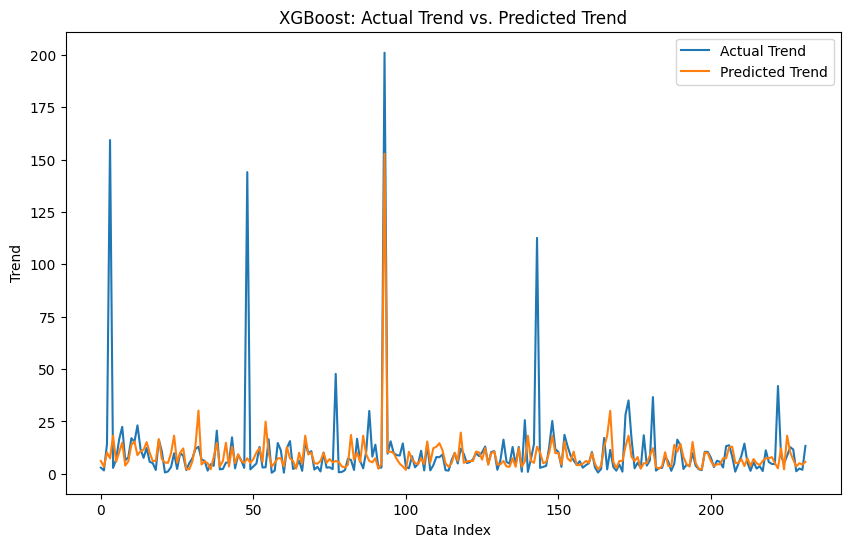


Result for LightGBM:
Mean Squared Error :1306.2336425059377
R-squared score:-2.040334498991957


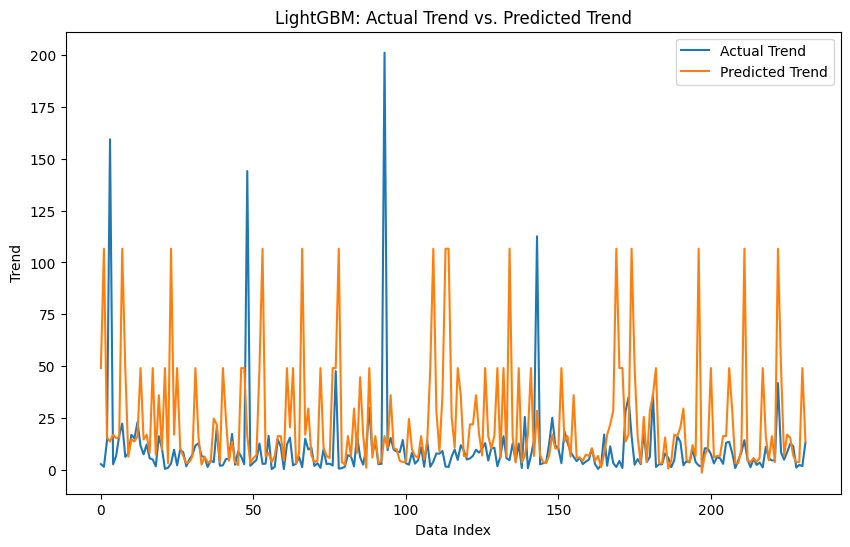


Result for Gradient Boosting Regressor:
Mean Squared Error :317.97059851209974
R-squared score:0.25990500561076846


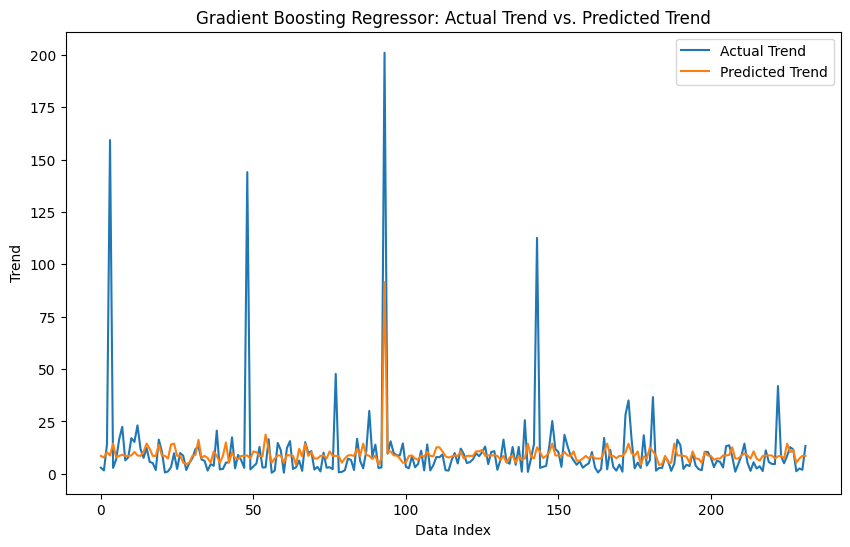


Result for ADA Boost:
Mean Squared Error :812.8219127333309
R-squared score:-0.8918901048045411


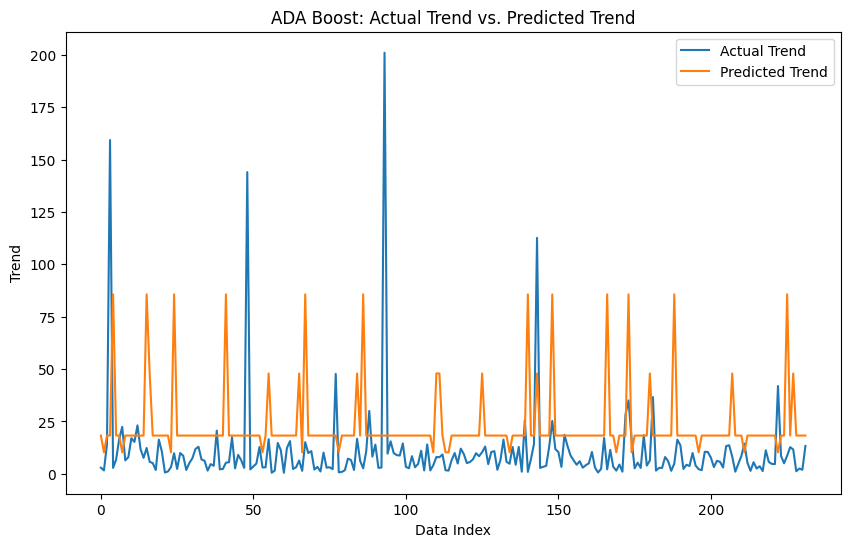


Result for Linear SVR:
Mean Squared Error :423.4264923199739
R-squared score:0.014450301618442962


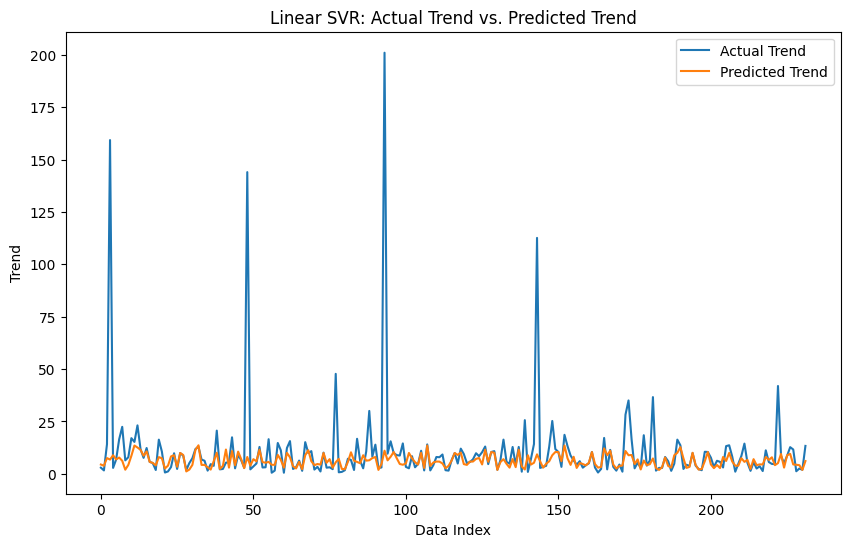

In [32]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost','Linear SVR']
accuracy=[]
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  print(f"Result for {name}:")
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  print(f"Mean Squared Error :{mse}")
  print(f"R-squared score:{r2}")
  plt.figure(figsize=(10, 6))
  plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
  plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
  plt.xlabel('Data Index')
  plt.ylabel('Trend')
  plt.title(f'{name}: Actual Trend vs. Predicted Trend')
  plt.legend()
  plt.show()
  accuracy.append(r2)
  print()